# **Graduate Admission *Prediction* using ANN**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
df = pd.read_csv('adm_data.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [7]:
df.shape

(400, 9)

<Axes: >

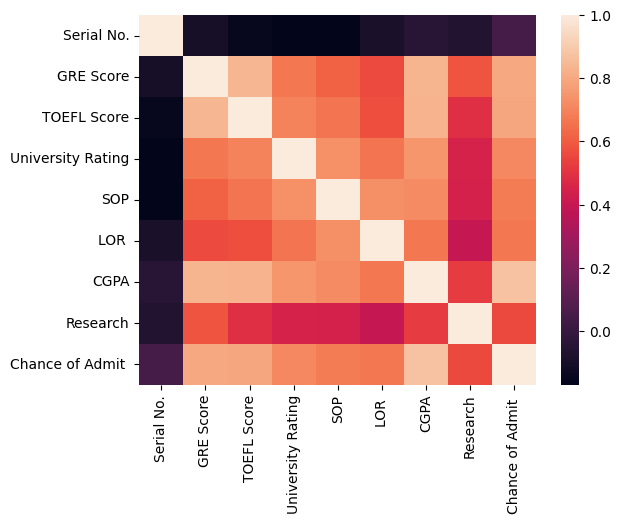

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
df.corr()
sns.heatmap(df.corr(),linecolor='white')


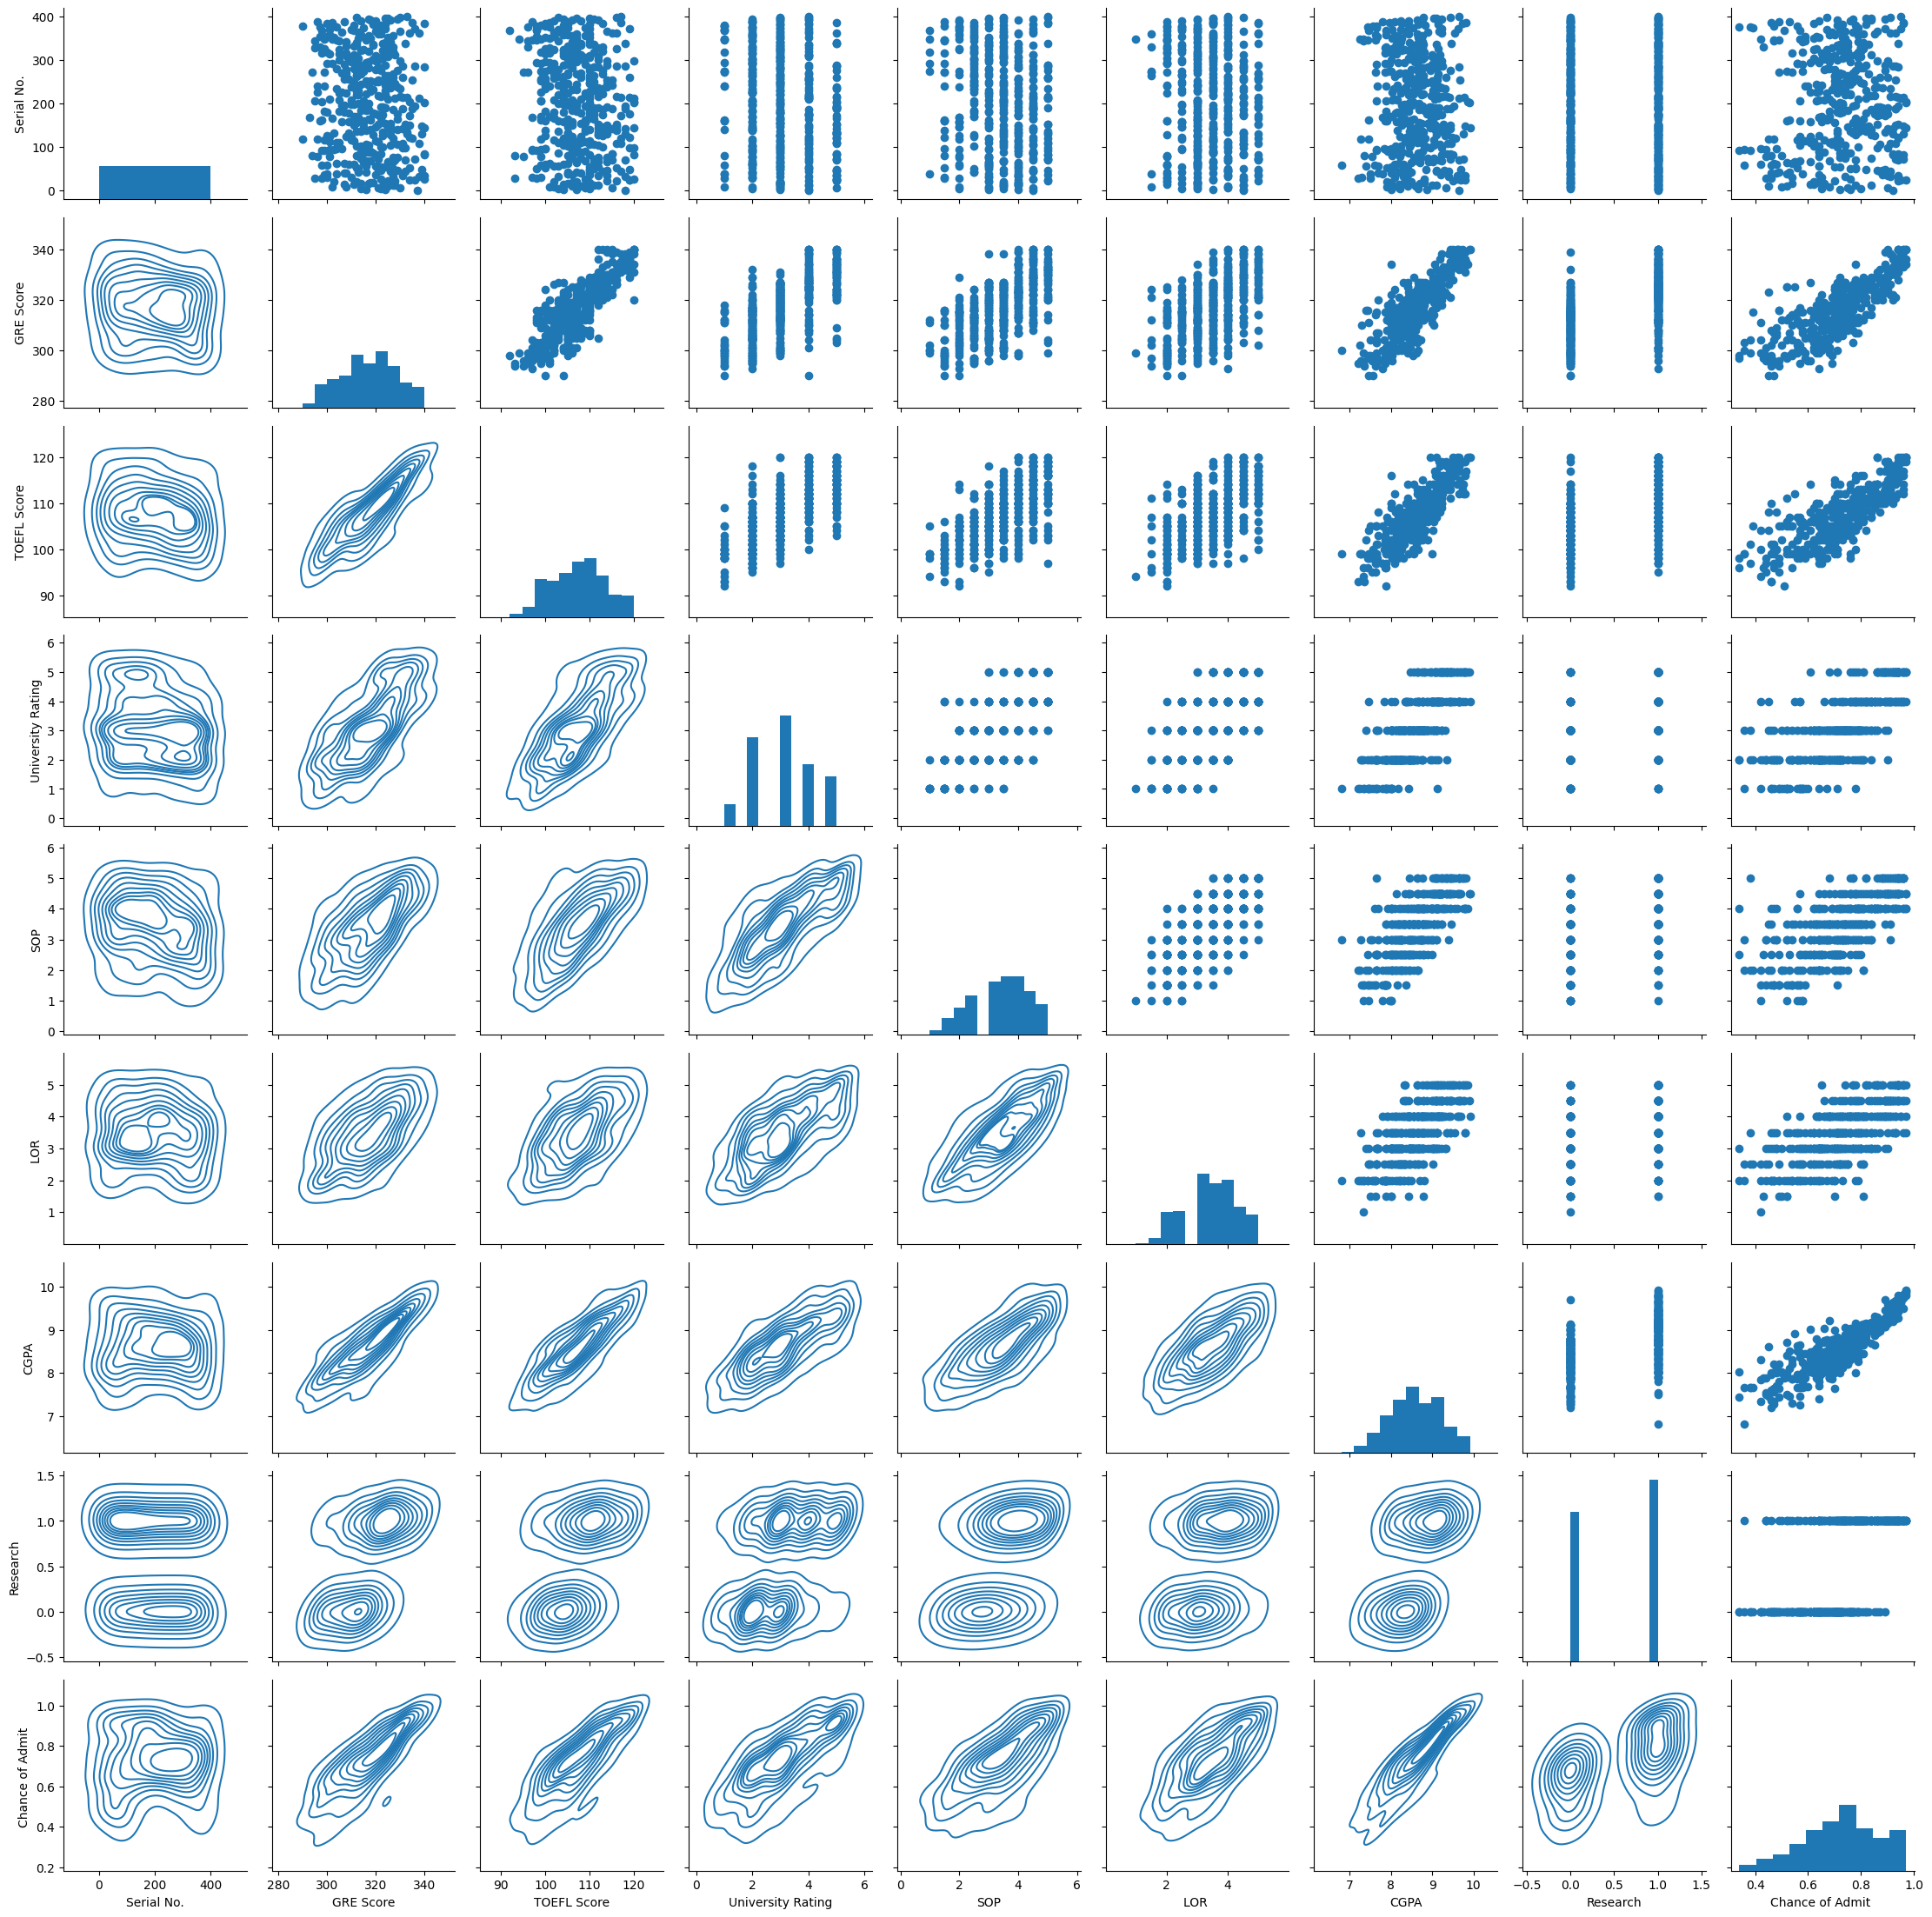

In [12]:
plot = sns.PairGrid(df)
plot.map_diag(plt.hist)
plot.map_upper(plt.scatter)
plot.map_lower(sns.kdeplot)

/tmp/ipython-input-1969282466.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GRE Score'])


<Axes: xlabel='GRE Score', ylabel='Density'>

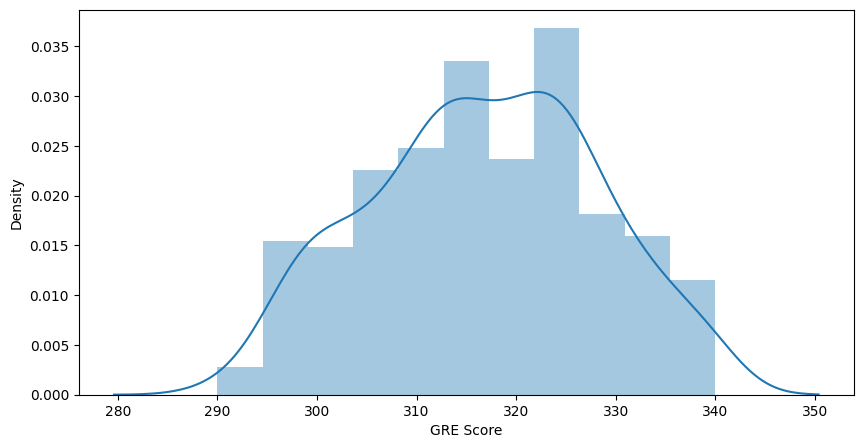

In [13]:
# distribution of GRE Score

plt.figure(figsize=(10,5))
sns.distplot(df['GRE Score'])

/tmp/ipython-input-737974739.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TOEFL Score'])


<Axes: xlabel='TOEFL Score', ylabel='Density'>

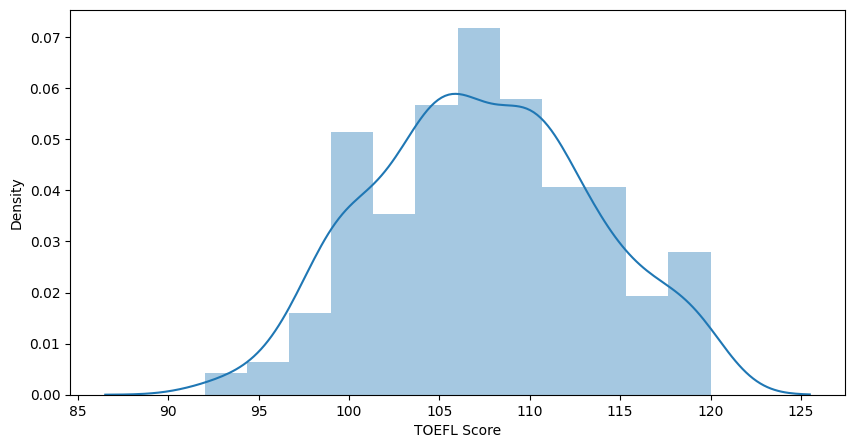

In [14]:
# distribution of toefl Score

plt.figure(figsize=(10,5))
sns.distplot(df['TOEFL Score'])


In [15]:
df.drop(columns=['Serial No.'],inplace=True)

In [16]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [17]:
X = df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [18]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [19]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
395,0.82
396,0.84
397,0.91
398,0.67


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [21]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [23]:
X_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [24]:
X_test_scaled

array([[ 0.44      ,  0.39285714,  0.5       ,  0.625     ,  0.71428571,
         0.58088235,  0.        ],
       [ 0.2       ,  0.28571429,  0.5       ,  0.25      ,  0.42857143,
         0.53676471,  1.        ],
       [ 0.68      ,  0.71428571,  0.75      ,  0.75      ,  0.57142857,
         0.57720588,  1.        ],
       [ 0.68      ,  0.53571429,  1.        ,  0.625     ,  0.71428571,
         0.53676471,  1.        ],
       [ 0.64      ,  0.64285714,  0.75      ,  0.75      ,  1.        ,
         0.70955882,  1.        ],
       [ 0.36      ,  0.5       ,  0.5       ,  0.5       ,  0.42857143,
         0.38235294,  0.        ],
       [ 0.4       ,  0.5       ,  0.25      ,  0.625     ,  0.28571429,
         0.41544118,  0.        ],
       [ 0.2       ,  0.35714286,  0.25      ,  0.125     ,  0.14285714,
         0.24632353,  0.        ],
       [ 0.4       ,  0.25      ,  0.25      ,  0.125     ,  0.14285714,
         0.03676471,  0.        ],
       [ 1.        ,  0.7142

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [33]:
history = model.fit(X_train_scaled,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1236 - val_loss: 0.1177
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1113 - val_loss: 0.1003
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0929 - val_loss: 0.0849
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0805 - val_loss: 0.0715
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0631 - val_loss: 0.0600
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0524 - val_loss: 0.0503
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0474 - val_loss: 0.0422
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0401 - val_loss: 0.0357
Epoch 9/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0356 - val_loss: 0.0306
Epoch 10/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0295 - val_loss: 0.0267
Epoch 11/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0276 - val_loss: 0.0239
Epoch 12/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0243 - val_loss: 0.0219
Epoch 13/25


In [34]:
y_pred=model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4217216127065052

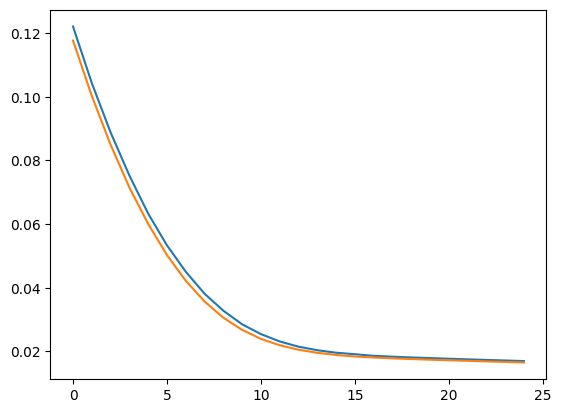

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])